<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/Tarea_20_Ejercicios_de_Normalizacion_Mateo_Gonzalez_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?


In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
caracteristica_alcohol = 'alcohol'
datos_alcohol = df[caracteristica_alcohol]
print(f"\n--- Análisis de la característica '{caracteristica_alcohol}' ---")
print(f"\nEstadísticas descriptivas de {caracteristica_alcohol}:")
print(f"Media: {datos_alcohol.mean():.2f}")
print(f"Desviación estándar: {datos_alcohol.std():.2f}")
print(f"Mínimo: {datos_alcohol.min():.2f}")
print(f"Máximo: {datos_alcohol.max():.2f}")


--- Análisis de la característica 'alcohol' ---

Estadísticas descriptivas de alcohol:
Media: 13.00
Desviación estándar: 0.81
Mínimo: 11.03
Máximo: 14.83


In [ ]:
from scipy.stats import shapiro

statistic, p_value = shapiro(datos_alcohol)

print(f"\n--- Prueba de Normalidad Shapiro-Wilk para '{caracteristica_alcohol}' ---")
print(f"Estadístico de prueba: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")


--- Prueba de Normalidad Shapiro-Wilk para 'alcohol' ---
Estadístico de prueba: 0.9818
Valor p: 0.0200


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_alcohol_normalizados = scaler.fit_transform(datos_alcohol.values.reshape(-1, 1))

print(f"\n--- Normalización Min-Max aplicada ---")
print(f"Valores originales (primeros 5): {datos_alcohol.values[:5]}")
print(f"Valores normalizados (primeros 5): {datos_alcohol_normalizados.flatten()[:5]}")
print(f"Rango normalizado: [{datos_alcohol_normalizados.min():.4f}, {datos_alcohol_normalizados.max():.4f}]")


--- Normalización Min-Max aplicada ---
Valores originales (primeros 5): [14.23 13.2  13.16 14.37 13.24]
Valores normalizados (primeros 5): [0.84210526 0.57105263 0.56052632 0.87894737 0.58157895]
Rango normalizado: [0.0000, 1.0000]



--- Normalización Min-Max aplicada ---
Valores originales (primeros 5): [14.23 13.2  13.16 14.37 13.24]
Valores normalizados (primeros 5): [0.84210526 0.57105263 0.56052632 0.87894737 0.58157895]
Rango normalizado: [0.0000, 1.0000]

--- PRUEBA DE NORMALIDAD (ORIGINAL) ---
Estadístico: 0.9818
P-valor: 0.0200

--- PRUEBA DE NORMALIDAD (NORMALIZADO) ---
Estadístico: 0.9818
P-valor: 0.0200

--- INTERPRETACIÓN (α = 0.05) ---
ANTES de normalizar: No normal
DESPUÉS de normalizar: No normal


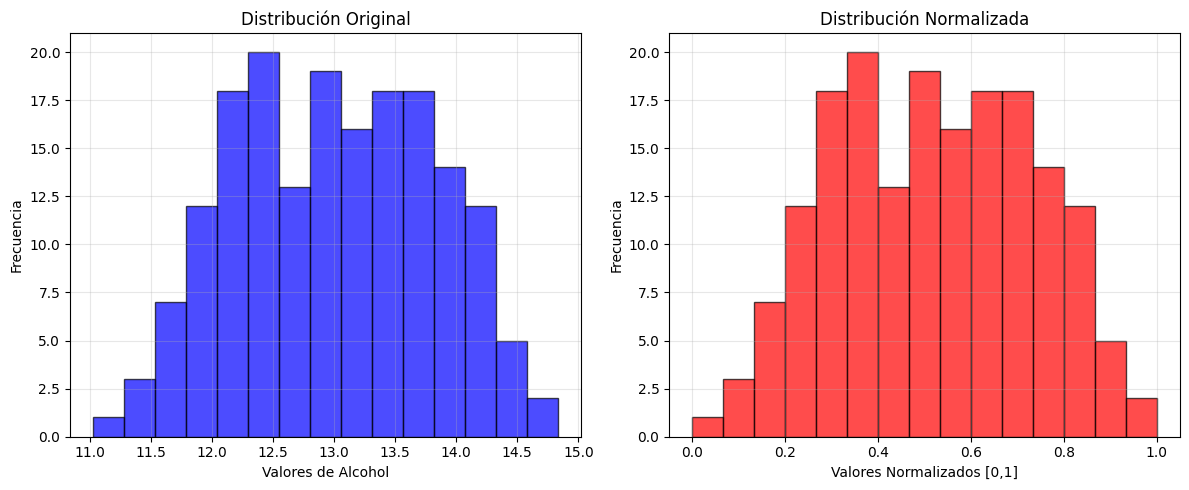

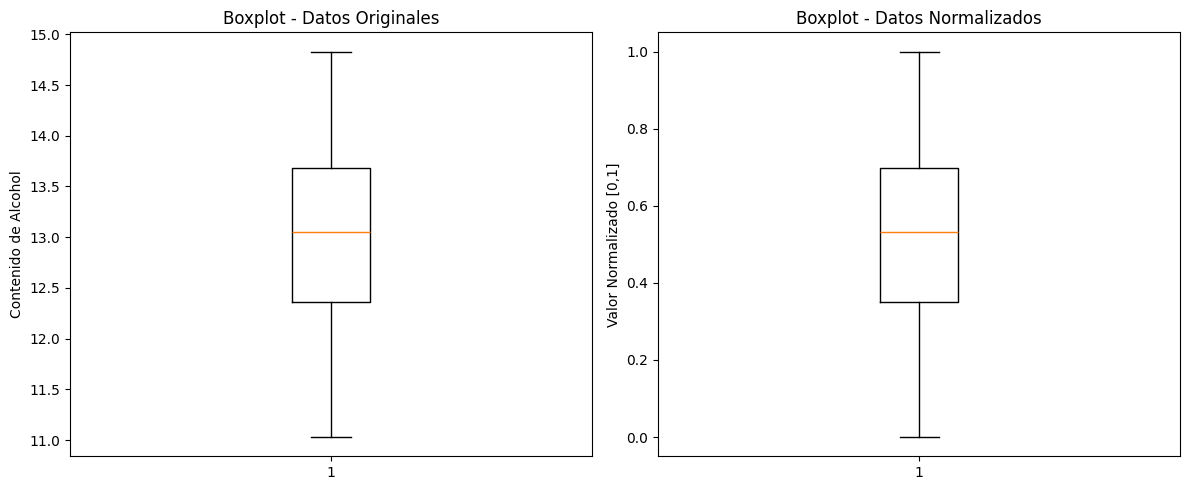

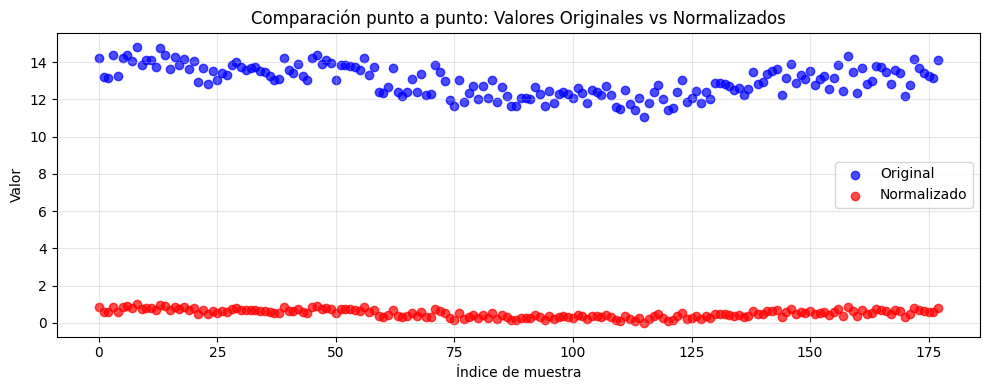

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro

scaler = MinMaxScaler()
datos_alcohol_normalizados = scaler.fit_transform(datos_alcohol.values.reshape(-1, 1))

print(f"\n--- Normalización Min-Max aplicada ---")
print(f"Valores originales (primeros 5): {datos_alcohol.values[:5]}")
print(f"Valores normalizados (primeros 5): {datos_alcohol_normalizados.flatten()[:5]}")
print(f"Rango normalizado: [{datos_alcohol_normalizados.min():.4f}, {datos_alcohol_normalizados.max():.4f}]")

statistic_original, p_value_original = shapiro(datos_alcohol)
statistic_norm, p_value_norm = shapiro(datos_alcohol_normalizados)

print(f"\n--- PRUEBA DE NORMALIDAD (ORIGINAL) ---")
print(f"Estadístico: {statistic_original:.4f}")
print(f"P-valor: {p_value_original:.4f}")

print(f"\n--- PRUEBA DE NORMALIDAD (NORMALIZADO) ---")
print(f"Estadístico: {statistic_norm:.4f}")
print(f"P-valor: {p_value_norm:.4f}")

alpha = 0.05
print(f"\n--- INTERPRETACIÓN (α = {alpha}) ---")
print(f"ANTES de normalizar: {'Normal' if p_value_original > alpha else 'No normal'}")
print(f"DESPUÉS de normalizar: {'Normal' if p_value_norm > alpha else 'No normal'}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_alcohol, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Valores de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Distribución Original')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(datos_alcohol_normalizados, bins=15, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Valores Normalizados [0,1]')
plt.ylabel('Frecuencia')
plt.title('Distribución Normalizada')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(datos_alcohol)
plt.title('Boxplot - Datos Originales')
plt.ylabel('Contenido de Alcohol')

plt.subplot(1, 2, 2)
plt.boxplot(datos_alcohol_normalizados)
plt.title('Boxplot - Datos Normalizados')
plt.ylabel('Valor Normalizado [0,1]')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
indices = np.arange(len(datos_alcohol))
plt.scatter(indices, datos_alcohol, alpha=0.7, label='Original', color='blue')
plt.scatter(indices, datos_alcohol_normalizados, alpha=0.7, label='Normalizado', color='red')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Comparación punto a punto: Valores Originales vs Normalizados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Preguntas:

**¿Cómo afectó la normalización Min-Max a la distribución de los datos?**

La normalización Min-Max NO afectó la forma de la distribución, solo cambió la escala.

**¿Qué interpretas del p-valor antes y después de la normalización?**

p-valor es igual en ambas situaciones. (0.0200 antes y 0.0200 después). Por los valores se puede entender que al ser menor de 0.05 no existe normalizacion en los datos del alcohol.

# Ejercicio 2: Normalización Z-Score

**Instrucciones:**

1.	Cargar el dataset wine de sklearn.

2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

**Preguntas:**

1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?

2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
caracteristica_malic = 'malic_acid'
datos_malic = df[caracteristica_malic]
print(f"\n--- Análisis de la característica '{caracteristica_malic}' ---")
print(f"\nEstadísticas descriptivas de {caracteristica_malic}:")
print(f"Media: {datos_malic.mean():.2f}")
print(f"Desviación estándar: {datos_malic.std():.2f}")
print(f"Mínimo: {datos_malic.min():.2f}")
print(f"Máximo: {datos_malic.max():.2f}")


--- Análisis de la característica 'malic_acid' ---

Estadísticas descriptivas de malic_acid:
Media: 2.34
Desviación estándar: 1.12
Mínimo: 0.74
Máximo: 5.80


In [ ]:
from scipy.stats import shapiro

statistic, p_value = shapiro(datos_malic)

print(f"\n--- Prueba de Normalidad Shapiro-Wilk para '{caracteristica_malic}' ---")
print(f"Estadístico de prueba: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")


--- Prueba de Normalidad Shapiro-Wilk para 'malic_acid' ---
Estadístico de prueba: 0.8888
Valor p: 0.0000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_malic_zscore = scaler.fit_transform(datos_malic.values.reshape(-1, 1))

print(f"--- Normalización Z-Score aplicada ---")
print(f"Valores originales (primeros 5): {datos_malic.values[:5]}")
print(f"Valores Z-Score (primeros 5): {datos_malic_zscore.flatten()[:5]}")
print(f"Media después de Z-Score: {datos_malic_zscore.mean():.6f}")
print(f"Desviación estándar después de Z-Score: {datos_malic_zscore.std():.6f}")

statistic_z, p_value_z = shapiro(datos_malic_zscore)
print(f"\n--- Prueba de Normalidad para datos Z-SCORE ---")
print(f"Estadístico: {statistic_z:.4f}")
print(f"P-valor: {p_value_z:.4f}")

--- Normalización Z-Score aplicada ---
Valores originales (primeros 5): [1.71 1.78 2.36 1.95 2.59]
Valores Z-Score (primeros 5): [-0.5622498  -0.49941338  0.02123125 -0.34681064  0.22769377]
Media después de Z-Score: -0.000000
Desviación estándar después de Z-Score: 1.000000

--- Prueba de Normalidad para datos Z-SCORE ---
Estadístico: 0.8888
P-valor: 0.0000


In [ ]:
statistic, p_value = shapiro(datos_malic_zscore)

print(f"\n--- Prueba de Normalidad Shapiro-Wilk para '{caracteristica_malic}' ---")
print(f"Estadístico de prueba: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")


--- Prueba de Normalidad Shapiro-Wilk para 'malic_acid' ---
Estadístico de prueba: 0.8888
Valor p: 0.0000



--- Normalización Min-Max aplicada ---
Valores originales (primeros 5): [1.71 1.78 2.36 1.95 2.59]
Valores normalizados (primeros 5): [0.1916996  0.2055336  0.3201581  0.23913043 0.36561265]
Rango normalizado: [0.0000, 1.0000]

--- PRUEBA DE NORMALIDAD (ORIGINAL) ---
Estadístico: 0.8888
P-valor: 0.0000

--- PRUEBA DE NORMALIDAD (NORMALIZADO) ---
Estadístico: 0.8888
P-valor: 0.0000

--- INTERPRETACIÓN (α = 0.05) ---
ANTES de normalizar: No normal
DESPUÉS de normalizar: No normal


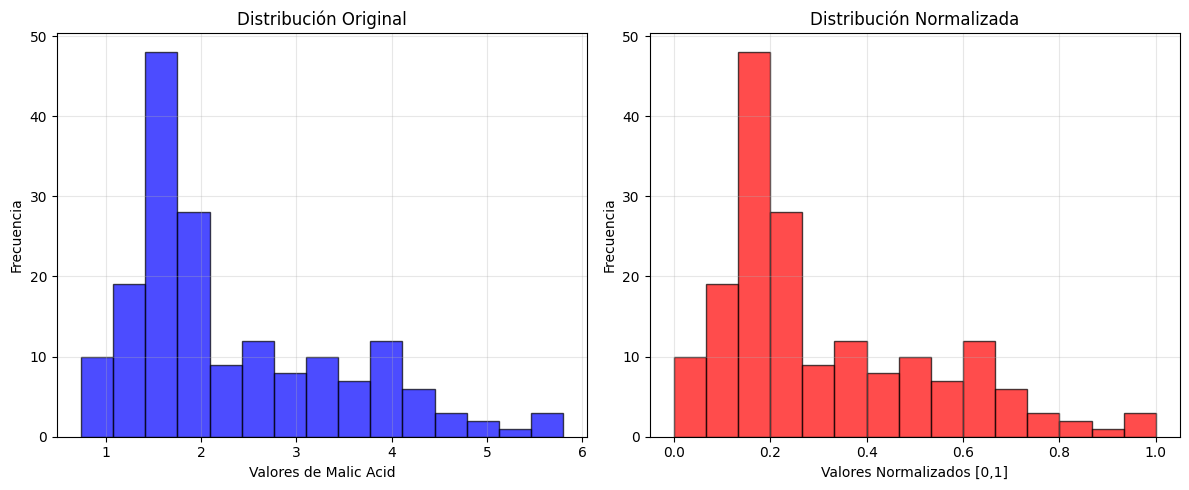

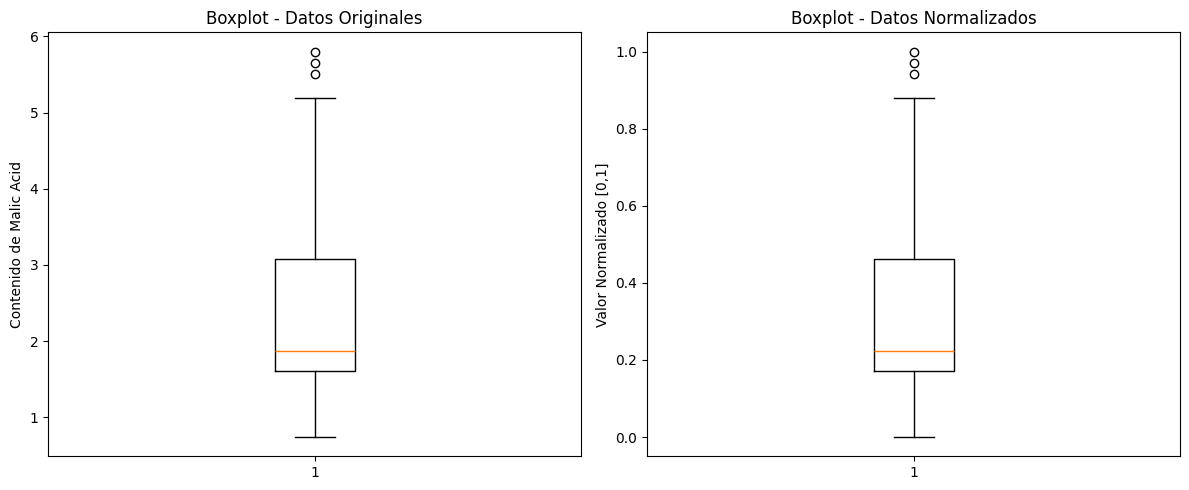

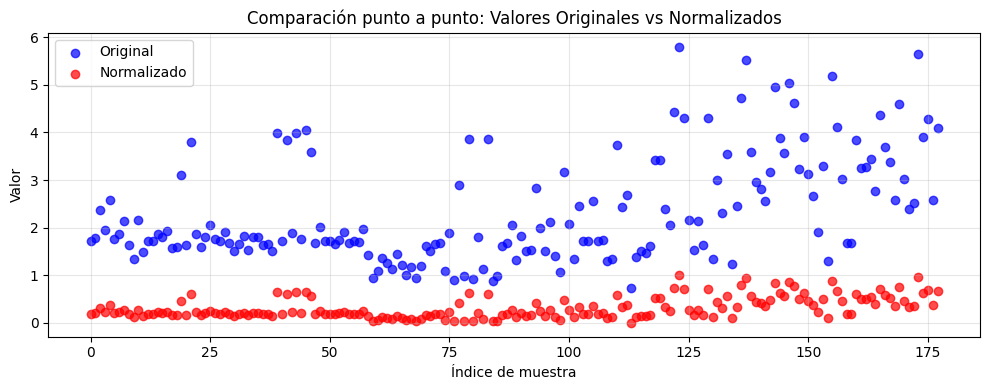

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro

scaler_mm = MinMaxScaler()
datos_malic_normalizados = scaler_mm.fit_transform(datos_malic.values.reshape(-1, 1))

print(f"\n--- Normalización Min-Max aplicada ---")
print(f"Valores originales (primeros 5): {datos_malic.values[:5]}")
print(f"Valores normalizados (primeros 5): {datos_malic_normalizados.flatten()[:5]}")
print(f"Rango normalizado: [{datos_malic_normalizados.min():.4f}, {datos_malic_normalizados.max():.4f}]")

statistic_original, p_value_original = shapiro(datos_malic)
statistic_norm, p_value_norm = shapiro(datos_malic_normalizados.flatten())

print(f"\n--- PRUEBA DE NORMALIDAD (ORIGINAL) ---")
print(f"Estadístico: {statistic_original:.4f}")
print(f"P-valor: {p_value_original:.4f}")

print(f"\n--- PRUEBA DE NORMALIDAD (NORMALIZADO) ---")
print(f"Estadístico: {statistic_norm:.4f}")
print(f"P-valor: {p_value_norm:.4f}")

alpha = 0.05
print(f"\n--- INTERPRETACIÓN (α = {alpha}) ---")
print(f"ANTES de normalizar: {'Normal' if p_value_original > alpha else 'No normal'}")
print(f"DESPUÉS de normalizar: {'Normal' if p_value_norm > alpha else 'No normal'}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_malic, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Valores de Malic Acid')
plt.ylabel('Frecuencia')
plt.title('Distribución Original')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(datos_malic_normalizados, bins=15, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Valores Normalizados [0,1]')
plt.ylabel('Frecuencia')
plt.title('Distribución Normalizada')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(datos_malic)
plt.title('Boxplot - Datos Originales')
plt.ylabel('Contenido de Malic Acid')

plt.subplot(1, 2, 2)
plt.boxplot(datos_malic_normalizados)
plt.title('Boxplot - Datos Normalizados')
plt.ylabel('Valor Normalizado [0,1]')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
indices = np.arange(len(datos_malic))
plt.scatter(indices, datos_malic, alpha=0.7, label='Original', color='blue')
plt.scatter(indices, datos_malic_normalizados, alpha=0.7, label='Normalizado', color='red')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Comparación punto a punto: Valores Originales vs Normalizados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Preguntas:

**¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**

La normalización z-score NO afectó la forma de la distribución, solo cambió la escala.

**¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**

Que se puede apreciar que valores estan en la media para saber que es un dato tipico y cuales no lo estan, que con la contra parte max-min no los puedes ver.

#Ejercicio 3: Transformación Logarítmica
**Instrucciones:**

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

**Preguntas:**

1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?

2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


In [ ]:
import numpy as np

np.random.seed(42)
datos_originales = np.random.exponential(scale=2.0, size=1000)

print("=== DATOS ALEATORIOS GENERADOS ===")
print(f"Tamaño del dataset: {len(datos_originales)}")

print("\n--- Estadísticas de los datos originales ---")
print(f"Media: {np.mean(datos_originales):.4f}")
print(f"Desviación estándar: {np.std(datos_originales):.4f}")
print(f"Mínimo: {np.min(datos_originales):.4f}")
print(f"Máximo: {np.max(datos_originales):.4f}")

datos_log = np.log(datos_originales)

print("\n=== TRANSFORMACIÓN LOGARÍTMICA APLICADA ===")

print("\n--- Estadísticas después de la transformación ---")
print(f"Media: {np.mean(datos_log):.4f}")
print(f"Desviación estándar: {np.std(datos_log):.4f}")
print(f"Mínimo: {np.min(datos_log):.4f}")
print(f"Máximo: {np.max(datos_log):.4f}")

=== DATOS ALEATORIOS GENERADOS ===
Tamaño del dataset: 1000

--- Estadísticas de los datos originales ---
Media: 1.9450
Desviación estándar: 1.9440
Mínimo: 0.0093
Máximo: 16.3449

=== TRANSFORMACIÓN LOGARÍTMICA APLICADA ===

--- Estadísticas después de la transformación ---
Media: 0.0795
Desviación estándar: 1.2641
Mínimo: -4.6793
Máximo: 2.7939


In [ ]:
from scipy.stats import shapiro

stat_orig, p_orig = shapiro(datos_originales)

print("--- PRUEBA DE NORMALIDAD ---")
print(f"Datos originales - Estadístico: {stat_orig:.4f}, p-valor: {p_orig:.4f}")

stat_log, p_log = shapiro(datos_log)

print(f"Datos transformados - Estadístico: {stat_log:.4f}, p-valor: {p_log:.4f}")

alpha = 0.05
print(f"\n--- INTERPRETACIÓN (α = {alpha}) ---")
print(f"Originales: {'Normal' if p_orig > alpha else 'No normal'}")
print(f"Transformados: {'Normal' if p_log > alpha else 'No normal'}")

--- PRUEBA DE NORMALIDAD ---
Datos originales - Estadístico: 0.8246, p-valor: 0.0000
Datos transformados - Estadístico: 0.9567, p-valor: 0.0000

--- INTERPRETACIÓN (α = 0.05) ---
Originales: No normal
Transformados: No normal


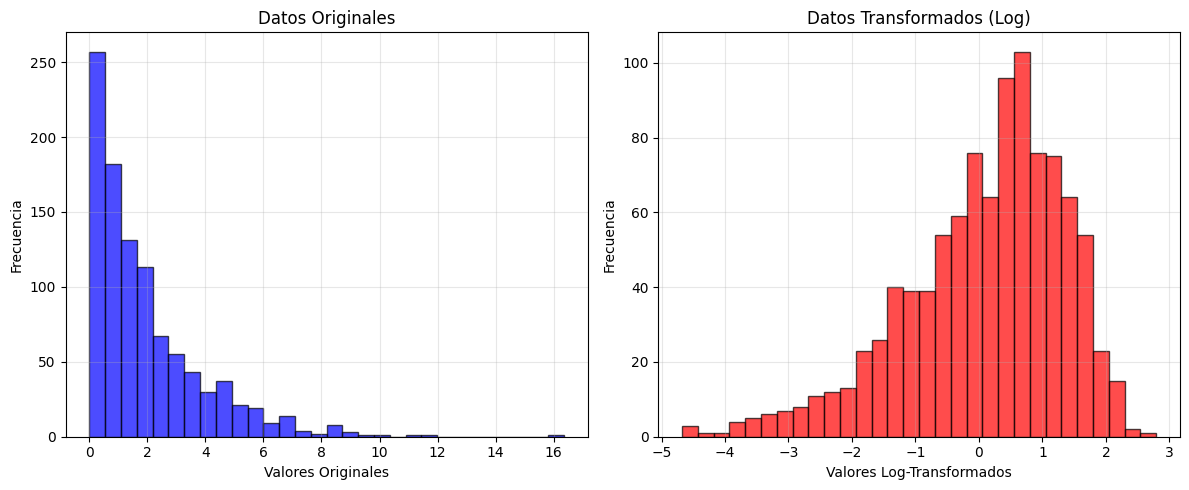

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_originales, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Valores Originales')
plt.ylabel('Frecuencia')
plt.title('Datos Originales')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(datos_log, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Valores Log-Transformados')
plt.ylabel('Frecuencia')
plt.title('Datos Transformados (Log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

stat_antes, p_antes = shapiro(datos_originales)

stat_despues, p_despues = shapiro(datos_log)

print("--- COMPARACIÓN P-VALOR ANTES vs DESPUÉS ---")
print(f"P-valor ANTES de transformación:  {p_antes:.20f}")
print(f"P-valor DESPUÉS de transformación: {p_despues:.20f}")

alpha = 0.05
print(f"\n--- INTERPRETACIÓN (α = {alpha}) ---")
print(f"ANTES:  {'Normal' if p_antes > alpha else 'No normal'} (p-valor = {p_antes:.20f})")
print(f"DESPUÉS: {'Normal' if p_despues > alpha else 'No normal'} (p-valor = {p_despues:.20f})")

--- COMPARACIÓN P-VALOR ANTES vs DESPUÉS ---
P-valor ANTES de transformación:  0.00000000000000000000
P-valor DESPUÉS de transformación: 0.00000000000000013218

--- INTERPRETACIÓN (α = 0.05) ---
ANTES:  No normal (p-valor = 0.00000000000000000000)
DESPUÉS: No normal (p-valor = 0.00000000000000013218)


In [ ]:
from scipy.stats import skew

skew_antes = skew(datos_originales)
skew_despues = skew(datos_log)

print("--- COMPARACIÓN DE ASIMETRÍA ---")
print(f"Asimetría ANTES:  {skew_antes:.4f}")
print(f"Asimetría DESPUÉS: {skew_despues:.4f}")
print(f"Mejoría: {abs(skew_antes - skew_despues):.4f}")


--- COMPARACIÓN DE ASIMETRÍA ---
Asimetría ANTES:  1.8650
Asimetría DESPUÉS: -0.8318
Mejoría: 2.6968



**Preguntas:**

**¿Cómo afectó la transformación logarítmica a la distribución de los datos?**

Redujo significativamente el sesgo (asimetría), tiene a hacer una distribucion mas normal pero no llega a tal punto.

**¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**

Que mejoro pero muy muy poco de

p-valor = 0.00000000000000000000

p-valor = 0.00000000000000013218

entonces no es suficiente.

#Ejercicio 4: Transformación Raíz Cuadrada
**Instrucciones:**

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

 **Preguntas:**

1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


In [ ]:
import numpy as np
from scipy.stats import shapiro, skew
import matplotlib.pyplot as plt

print("=== GENERANDO DATOS ALEATORIOS ===")
np.random.seed(42)
datos_originales = np.random.exponential(scale=2.0, size=1000)

print(f"Tamaño del dataset: {len(datos_originales)}")

print("\n--- Estadísticas de los datos originales ---")
print(f"Media: {np.mean(datos_originales):.4f}")
print(f"Desviación estándar: {np.std(datos_originales):.4f}")
print(f"Mínimo: {np.min(datos_originales):.4f}")
print(f"Máximo: {np.max(datos_originales):.4f}")

print("\n=== APLICANDO TRANSFORMACIÓN DE RAÍZ CUADRADA ===")
datos_raiz = np.sqrt(datos_originales)

print("\n--- Estadísticas después de la transformación ---")
print(f"Media: {np.mean(datos_raiz):.4f}")
print(f"Desviación estándar: {np.std(datos_raiz):.4f}")
print(f"Mínimo: {np.min(datos_raiz):.4f}")
print(f"Máximo: {np.max(datos_raiz):.4f}")

=== GENERANDO DATOS ALEATORIOS ===
Tamaño del dataset: 1000

--- Estadísticas de los datos originales ---
Media: 1.9450
Desviación estándar: 1.9440
Mínimo: 0.0093
Máximo: 16.3449

=== APLICANDO TRANSFORMACIÓN DE RAÍZ CUADRADA ===

--- Estadísticas después de la transformación ---
Media: 1.2323
Desviación estándar: 0.6531
Mínimo: 0.0964
Máximo: 4.0429


In [ ]:
from scipy.stats import shapiro

stat_antes, p_antes = shapiro(datos_originales)

stat_despues, p_despues = shapiro(datos_raiz)

print("--- PRUEBA DE NORMALIDAD SHAPIRO-WILK ---")
print(f"Datos originales - Estadístico: {stat_antes:.4f}, p-valor: {p_antes:.6f}")
print(f"Datos con raíz cuadrada - Estadístico: {stat_despues:.4f}, p-valor: {p_despues:.6f}")

alpha = 0.05
print(f"\n--- INTERPRETACIÓN (α = {alpha}) ---")
print(f"Originales: {'Normal' if p_antes > alpha else 'No normal'}")
print(f"Con raíz cuadrada: {'Normal' if p_despues > alpha else 'No normal'}")

--- PRUEBA DE NORMALIDAD SHAPIRO-WILK ---
Datos originales - Estadístico: 0.8246, p-valor: 0.000000
Datos con raíz cuadrada - Estadístico: 0.9699, p-valor: 0.000000

--- INTERPRETACIÓN (α = 0.05) ---
Originales: No normal
Con raíz cuadrada: No normal


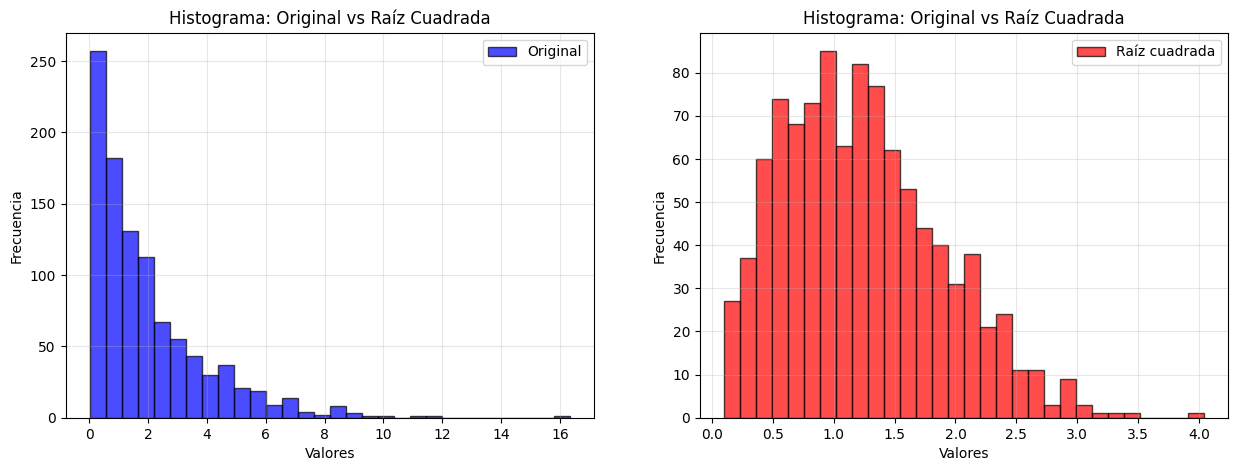

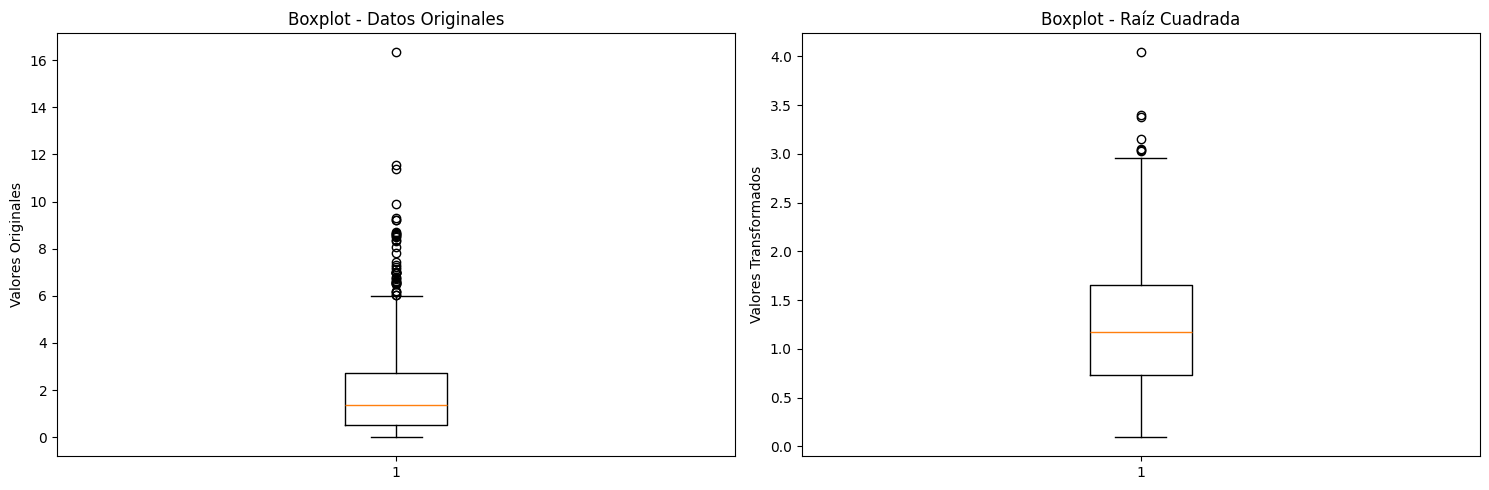

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_originales, bins=30, alpha=0.7, color='blue', edgecolor='black', label='Original')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma: Original vs Raíz Cuadrada')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(datos_raiz, bins=30, alpha=0.7, color='red', edgecolor='black', label='Raíz cuadrada')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma: Original vs Raíz Cuadrada')
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(datos_originales)
plt.title('Boxplot - Datos Originales')
plt.ylabel('Valores Originales')

plt.subplot(1, 2, 2)
plt.boxplot(datos_raiz)
plt.title('Boxplot - Raíz Cuadrada')
plt.ylabel('Valores Transformados')

plt.tight_layout()
plt.show()

 **Preguntas:**

**¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?**
La distribucion se hace mas simetrica debido a que los datos chicos los expande y los grandes los contrae, un balance por la raiz cuadrada.

**¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?**
Los hace mas chicos.

#Ejercicio 5: Transformación Box-Cox
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print("=== GENERANDO DATOS ALEATORIOS ===")
np.random.seed(42)
datos_originales = np.random.exponential(scale=2.0, size=1000)

print(f"Tamaño del dataset: {len(datos_originales)}")

print("\n--- Estadísticas de los datos originales ---")
print(f"Media: {np.mean(datos_originales):.4f}")
print(f"Desviación estándar: {np.std(datos_originales):.4f}")
print(f"Mínimo: {np.min(datos_originales):.4f}")
print(f"Máximo: {np.max(datos_originales):.4f}")

print("\n=== APLICANDO TRANSFORMACIÓN BOX-COX ===")
datos_boxcox, lambda_optimo = stats.boxcox(datos_originales)

print(f"Lambda óptimo encontrado: {lambda_optimo:.4f}")

print("\n--- Estadísticas después de Box-Cox ---")
print(f"Media: {np.mean(datos_boxcox):.4f}")
print(f"Desviación estándar: {np.std(datos_boxcox):.4f}")
print(f"Mínimo: {np.min(datos_boxcox):.4f}")
print(f"Máximo: {np.max(datos_boxcox):.4f}")

=== GENERANDO DATOS ALEATORIOS ===
Tamaño del dataset: 1000

--- Estadísticas de los datos originales ---
Media: 1.9450
Desviación estándar: 1.9440
Mínimo: 0.0093
Máximo: 16.3449

=== APLICANDO TRANSFORMACIÓN BOX-COX ===
Lambda óptimo encontrado: 0.2462

--- Estadísticas después de Box-Cox ---
Media: 0.2688
Desviación estándar: 1.2118
Mínimo: -2.7783
Máximo: 4.0188


In [ ]:
from scipy.stats import shapiro

stat_antes, p_antes = shapiro(datos_originales)

stat_despues, p_despues = shapiro(datos_boxcox)

print("--- PRUEBA DE NORMALIDAD SHAPIRO-WILK ---")
print(f"Datos originales - Estadístico: {stat_antes:.4f}, p-valor: {p_antes:.6f}")
print(f"Datos con Box-Cox - Estadístico: {stat_despues:.4f}, p-valor: {p_despues:.6f}")

alpha = 0.05
print(f"\n--- INTERPRETACIÓN (α = {alpha}) ---")
print(f"Originales: {'Normal' if p_antes > alpha else 'No normal'}")
print(f"Con raíz Box-Cox: {'Normal' if p_despues > alpha else 'No normal'}")

--- PRUEBA DE NORMALIDAD SHAPIRO-WILK ---
Datos originales - Estadístico: 0.8246, p-valor: 0.000000
Datos con raíz cuadrada - Estadístico: 0.9953, p-valor: 0.003680

--- INTERPRETACIÓN (α = 0.05) ---
Originales: No normal
Con raíz cuadrada: No normal


In [ ]:
from scipy import stats
import numpy as np

datos_boxcox, lambda_optimo = stats.boxcox(datos_originales)

print(f"=== ANÁLISIS DE BOX-COX ===")
print(f"Lambda óptimo encontrado: {lambda_optimo:.4f}")

print(f"\n--- INTERPRETACIÓN DEL LAMBDA ---")
if abs(lambda_optimo - 1) < 0.1:
    print("≈ Transformación LINEAL (datos ya normales)")
elif abs(lambda_optimo - 0.5) < 0.1:
    print("≈ Transformación RAÍZ CUADRADA")
elif abs(lambda_optimo - 0) < 0.1:
    print("≈ Transformación LOGARÍTMICA")
elif abs(lambda_optimo - (-0.5)) < 0.1:
    print("≈ Transformación RECÍPROCA DE RAÍZ CUADRADA")
elif abs(lambda_optimo - (-1)) < 0.1:
    print("≈ Transformación RECÍPROCA (1/x)")
else:
    print(f"Transformación INTERMEDIA: x^{lambda_optimo:.3f}")

from scipy.stats import shapiro, skew

stat_antes, p_antes = shapiro(datos_originales)
stat_despues, p_despues = shapiro(datos_boxcox)
skew_antes = skew(datos_originales)
skew_despues = skew(datos_boxcox)

print(f"\n--- MEJORA EN NORMALIDAD ---")
print(f"P-valor ANTES: {p_antes:.6f}")
print(f"P-valor DESPUÉS: {p_despues:.6f}")
print(f"Mejora en p-valor: {p_despues - p_antes:.6f}")

print(f"\nAsimetría ANTES: {skew_antes:.4f}")
print(f"Asimetría DESPUÉS: {skew_despues:.4f}")
print(f"Reducción de asimetría: {skew_antes - skew_despues:.4f}")

print(f"\n--- EJEMPLOS DE TRANSFORMACIÓN ---")
print("Original -> Box-Cox:")
for i in range(5):
    orig = datos_originales[i]
    trans = datos_boxcox[i]
    print(f"  {orig:.4f} -> {trans:.4f}")

=== ANÁLISIS DE BOX-COX ===
Lambda óptimo encontrado: 0.2462

--- INTERPRETACIÓN DEL LAMBDA ---
Transformación INTERMEDIA: x^0.246

--- MEJORA EN NORMALIDAD ---
P-valor ANTES: 0.000000
P-valor DESPUÉS: 0.003680
Mejora en p-valor: 0.003680

Asimetría ANTES: 1.8650
Asimetría DESPUÉS: -0.0553
Reducción de asimetría: 1.9203

--- EJEMPLOS DE TRANSFORMACIÓN ---
Original -> Box-Cox:
  0.9385 -> -0.0629
  6.0202 -> 2.2573
  2.6335 -> 1.0935
  1.8259 -> 0.6490
  0.3392 -> -0.9491


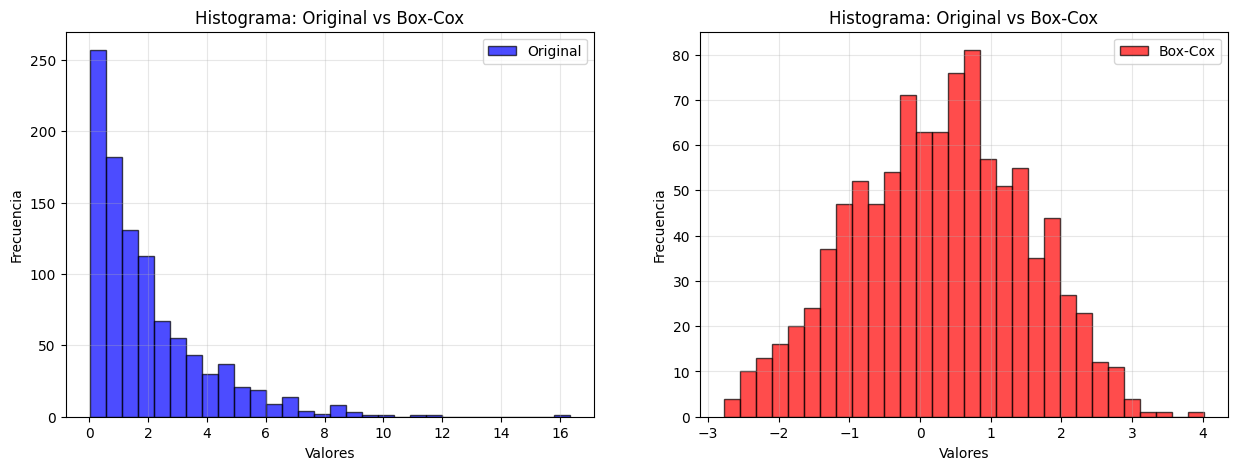

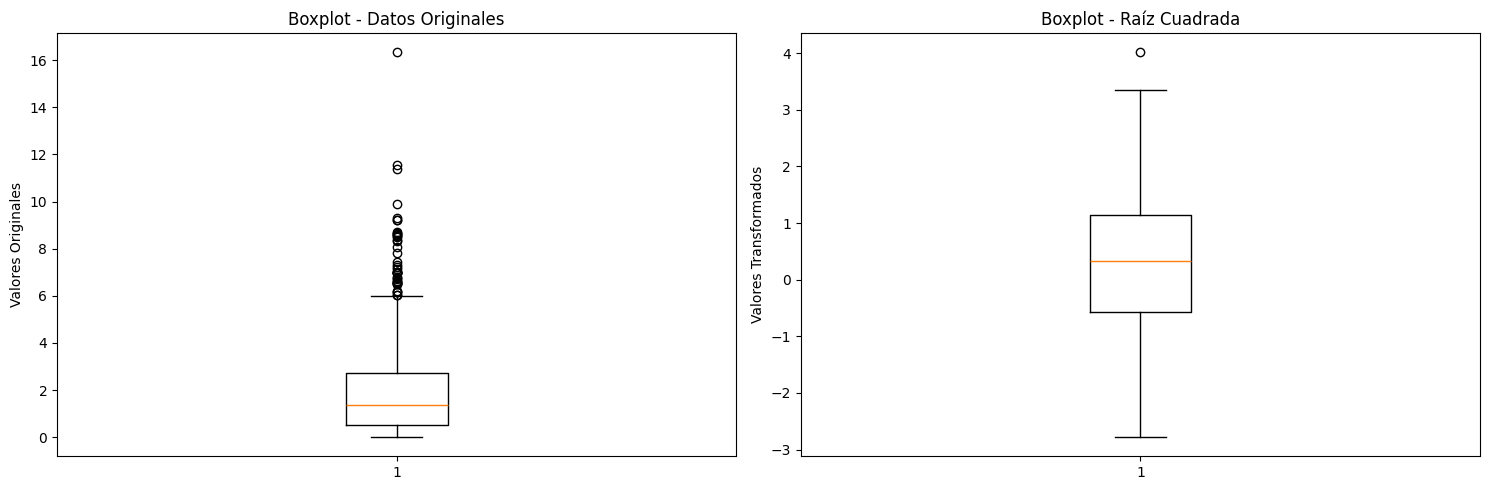

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_originales, bins=30, alpha=0.7, color='blue', edgecolor='black', label='Original')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma: Original vs Box-Cox')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(datos_boxcox, bins=30, alpha=0.7, color='red', edgecolor='black', label='Box-Cox')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma: Original vs Box-Cox')
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(datos_originales)
plt.title('Boxplot - Datos Originales')
plt.ylabel('Valores Originales')

plt.subplot(1, 2, 2)
plt.boxplot(datos_boxcox)
plt.title('Boxplot - Raíz Cuadrada')
plt.ylabel('Valores Transformados')

plt.tight_layout()
plt.show()

**Preguntas:**

**¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

Box-Cox encontro que la transformacion optima era x^0.246, lo que significa que aplico una transformación intermedia entre el logaritmo y la raiz cuadrada. Esto hizo la distribución mucho mas simetrica y redujo significativamente el sesgo, acercandola mucho mas a una distribución normal que las transformaciones fijas anteriores.


**¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**

El lambda (λ = 0.246) determina el tipo y fuerza de la transformación. En este caso, al estar entre 0 y 0.5, indica que se necesita una transformacion más fuerte que la raiz cuadrada pero menos fuerte que el logaritmo para normalizar estos datos especificos. Box-Cox optimiza automaticamente este valor para maximizar la normalidad.